In [1]:
import pandas as pd

with open('../data/kym.json', 'r') as file:
    data = pd.read_json(file)

data.head()

,title,url,last_update_source,category,template_image_url,meta,ld,added,details,content,tags,additional_references,search_keywords,parent,siblings,children
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,1547002898,Meme,https://i.kym-cdn.com/entries/icons/original/0...,{'og:title': 'This is Relevant To My Interests...,"{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'I Can Has C...","{'about': {'text': ['""This is Relevant To My I...","[image macros, comment, comments, approval, im...",{},"[\""This is relevant to my interests\""]",NaN,NaN,NaN
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,1591400337,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'ROFLcopter', 'og:site_name': 'Kn...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'Warcraft II...",{'about': {'text': ['ROFLcopter is an Internet...,"[ascii, animated gif, rofl, acronym, initialism]",{'Encyclopedia Dramatica': 'https://encycloped...,[roflcopter],https://knowyourmeme.com/memes/lol-ascii,"[https://knowyourmeme.com/memes/lollerskates, ...",NaN
2,Bitches Don't Know,https://knowyourmeme.com/memes/bitches-dont-know,1607986999,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'Bitches Don't Know', 'og:site_na...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'MySpace', '...",{'about': {'text': ['Bitches Don't Know is an ...,"[myspace, 4chan, parody, know, bitches, dont, ...","{'Facebook,': 'https://www.facebook.com/search...",[bitches don't know],NaN,NaN,[https://knowyourmeme.com/memes/bitches-dont-k...
3,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,1613129339,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'Leave Britney Alone', 'og:site_n...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'YouTube', '...","{'about': {'text': ['""Leave Britney Alone"" is ...","[youtube, rant, britney spears, response, frea...",{'Wikipedia': 'https://en.wikipedia.org/wiki/C...,"[\""leave britney alone\"", \""chris crocker\""]",https://knowyourmeme.com/memes/people/chris-cr...,[https://knowyourmeme.com/memes/leave-britney-...,NaN
4,O RLY?,https://knowyourmeme.com/memes/o-rly,1615643899,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'O RLY?', 'og:site_name': 'Know Y...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'Something A...",{'about': {'text': ['O RLY is internet slang f...,"[image macro, owl, orly, o rly, negative, some...","{'Meme Generator,': 'https://imgflip.com/meme/...","[\""o rly\""]",https://knowyourmeme.com/memes/lolspeak-chanspeak,"[https://knowyourmeme.com/memes/normie, https:...",NaN


In [2]:
data['cleaned_type'] = ""

# Iterate through rows
for index, row in data.iterrows():
    types = row['details'].get('type', [])
    cleaned_types = [t.replace('https://knowyourmeme.com/types/', '') for t in types]
    data.at[index, 'cleaned_type'] = cleaned_types

# Count instances with empty 'cleaned_type'
empty_type_count = sum(len(row['cleaned_type']) == 0 for index, row in data.iterrows())
print(f"Number of entries with 'cleaned_type': {len(data) - empty_type_count}")
print(f"Number of entries with empty 'cleaned_type': {empty_type_count}")

# Remove entries with empty 'cleaned_type'
data = data[data['cleaned_type'].apply(len) > 0]

Number of entries with 'cleaned_type': 14256
Number of entries with empty 'cleaned_type': 14543


In [3]:
data['cleaned_description'] = ""

# Initialize a variable to store the count of rows with float values
float_rows_count = 0

# Iterate through rows
for index, row in data.iterrows():
    content_value = row['content']

    if isinstance(content_value, dict):
        about_text = content_value.get('about', {}).get('text', [])
        cleaned_description = ' '.join(about_text)  # Combine text into a single string
        data.at[index, 'cleaned_description'] = cleaned_description
    else:
        float_rows_count += 1
        data.at[index, 'cleaned_description'] = ''

# Drop rows where 'content' is of type float
data = data.dropna(subset=['content'])

print(f"Number of rows dropped with float 'content': {float_rows_count}")
data.head()


Number of rows dropped with float 'content': 10008


,title,url,last_update_source,category,template_image_url,meta,ld,added,details,content,tags,additional_references,search_keywords,parent,siblings,children,cleaned_type,cleaned_description
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,1591400337,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'ROFLcopter', 'og:site_name': 'Kn...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'Warcraft II...",{'about': {'text': ['ROFLcopter is an Internet...,"[ascii, animated gif, rofl, acronym, initialism]",{'Encyclopedia Dramatica': 'https://encycloped...,[roflcopter],https://knowyourmeme.com/memes/lol-ascii,"[https://knowyourmeme.com/memes/lollerskates, ...",NaN,[slang],ROFLcopter is an Internet slang term used as a...
2,Bitches Don't Know,https://knowyourmeme.com/memes/bitches-dont-know,1607986999,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'Bitches Don't Know', 'og:site_na...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'MySpace', '...",{'about': {'text': ['Bitches Don't Know is an ...,"[myspace, 4chan, parody, know, bitches, dont, ...","{'Facebook,': 'https://www.facebook.com/search...",[bitches don't know],NaN,NaN,[https://knowyourmeme.com/memes/bitches-dont-k...,[exploitable],Bitches Don't Know is an exploitable image mac...
6,In Soviet Russia...,https://knowyourmeme.com/memes/in-soviet-russia,1618689378,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'In Soviet Russia...', 'og:site_n...","{'@context': 'http://schema.org', '@type': 'Br...",NaN,"{'status': 'confirmed', 'origin': 'Leave It To...","{'about': {'text': ['In Soviet Russia, also kn...","[russia, russian reversal, image macro, soviet...","{'Encyclopedia Dramatica,': 'https://encyclope...","[\""in soviet russia\"", \""russian reversal\""]",NaN,NaN,NaN,[snowclone],"In Soviet Russia, also known as the Russian Re..."
7,Domo,https://knowyourmeme.com/memes/domo,1609402791,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'Domo', 'og:site_name': 'Know You...","{'@context': 'http://schema.org', '@type': 'Br...",1.231010e+09,"{'status': 'confirmed', 'origin': 'Newgrounds'...",{'about': {'text': ['Domo is a Japanese charac...,"[non-english, copy & paste, photoshop, nhk, ca...","{'Encyclopedia Dramatica,': 'https://encyclope...","[domo-kun, \u3069\u30fc\u3082\u304f\u3093]",NaN,NaN,[https://knowyourmeme.com/memes/every-time-you...,[character],Domo is a Japanese character often pasted in t...
8,I Like Turtles,https://knowyourmeme.com/memes/i-like-turtles,1604343920,Meme,https://i.kym-cdn.com/entries/icons/original/0...,"{'og:title': 'I Like Turtles', 'og:site_name':...","{'@context': 'http://schema.org', '@type': 'Br...",1.229113e+09,"{'status': 'confirmed', 'origin': 'KGW News', ...","{'about': {'text': ['""I Like Turtles"" is a phr...","[newscast, viral videos, catchphrase, jonathan...",{'Encyclopedia Dramatica': 'https://encycloped...,"[\""i like turtles\""]",https://knowyourmeme.com/memes/viral-videos,[https://knowyourmeme.com/memes/please-give-me...,NaN,[viral-video],"""I Like Turtles"" is a phrase first uttered by ..."


In [4]:
print(f"Number of rows in the DataFrame after preprocessing: {len(data)}")

Number of rows in the DataFrame after preprocessing: 4248


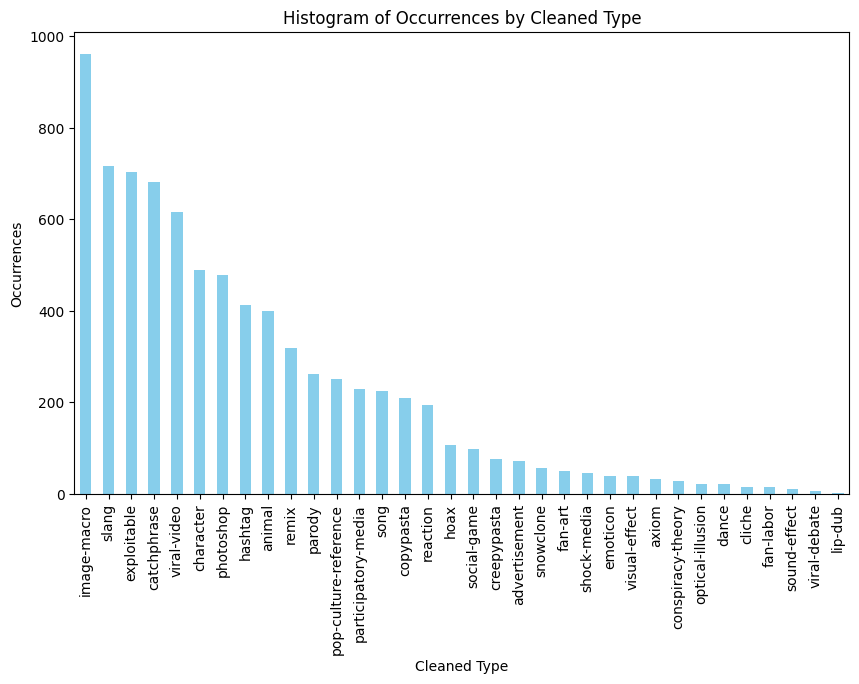

In [5]:
import matplotlib.pyplot as plt

# Flatten the 'cleaned_type' lists
all_types = [item for sublist in data['cleaned_type'] for item in sublist]

# Create a DataFrame for counting occurrences
types_df = pd.DataFrame({'type': all_types})

# Plot a histogram
plt.figure(figsize=(10, 6))
types_df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Occurrences by Cleaned Type')
plt.xlabel('Cleaned Type')
plt.ylabel('Occurrences')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data[["cleaned_description"]]
y = data["cleaned_type"]

# Convert tags to binary array
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(data["tags"])

# Vectorize features
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binarized, test_size=0.2)

# Train classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [1, 4248]

In [7]:
# Count the occurrences of each type
type_counts = pd.Series([item for sublist in data['cleaned_type'] for item in sublist]).value_counts()

# Filter types that occur more than 400 times
types_to_keep = type_counts[type_counts >= 400].index

print(types_to_keep)

# Function to get the most frequent type from a list
def get_most_frequent_type(types):
    return max(types, key=lambda x: type_counts[x])

# Apply the function to get the most frequent type for each row
data['cleaned_type'] = data['cleaned_type'].apply(get_most_frequent_type)

# Filter the dataframe based on the selected types
data = data[data['cleaned_type'].isin(types_to_keep)]

# Display the resulting dataframe
print(data)

Index(['image-macro', 'slang', 'exploitable', 'catchphrase', 'viral-video',
       'character', 'photoshop', 'hashtag', 'animal'],
      dtype='object')
                                      title  \
1                                ROFLcopter   
2                        Bitches Don't Know   
7                                      Domo   
8                            I Like Turtles   
15     One Does Not Simply Walk Into Mordor   
...                                     ...   
28780                          Vagina Bones   
28785                                 Memes   
28790                          Image Macros   
28792                 Bait-and-switch Media   
28796                        Nightmare Fuel   

                                                     url  last_update_source  \
1              https://knowyourmeme.com/memes/roflcopter          1591400337   
2       https://knowyourmeme.com/memes/bitches-dont-know          1607986999   
7                    https://knowyourmeme.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data[["cleaned_description"]]
y = data["cleaned_type"]

# Convert tags to binary array
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(data["tags"])

# Vectorize features
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binarized, test_size=0.2)

# Train classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [1, 2843]